### **The Overall DB Schema**

| Table Name | Description |
| --- | --- |
| **Users** | Stores user information |
| **Events** | Stores event details |
| **EventAttendees** | Tracks who is attending each event |

**DB UML Diagram:**

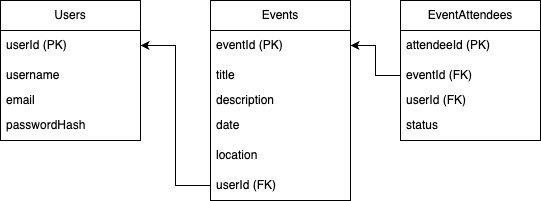

**SpectrumSync DB Schema**

In [ ]:
-- DB Schema 
CREATE TABLE Users (
    userId INT IDENTITY(1,1) PRIMARY KEY,
    username NVARCHAR(50) NOT NULL,
    email NVARCHAR(100) NOT NULL UNIQUE,
    passwordHash NVARCHAR(255) NOT NULL,
    isAutistic BIT DEFAULT 0, -- New column to identify autistic users
    createdAt DATETIME DEFAULT GETDATE()
);

CREATE TABLE Events (
    eventId INT IDENTITY(1,1) PRIMARY KEY,
    title NVARCHAR(100) NOT NULL,
    description NVARCHAR(MAX),
    date DATETIME NOT NULL,
    location NVARCHAR(255),
    userId INT NOT NULL, -- Foreign key referencing Users.userId
    createdAt DATETIME DEFAULT GETDATE(),
    FOREIGN KEY (userId) REFERENCES Users(userId) ON DELETE CASCADE
);

CREATE TABLE EventAttendees (
    attendeeId INT IDENTITY(1,1) PRIMARY KEY,
    eventId INT NOT NULL,
    userId INT NOT NULL,
    status NVARCHAR(50) DEFAULT 'Pending',
    FOREIGN KEY (eventId) REFERENCES Events(eventId) ON DELETE CASCADE,
    FOREIGN KEY (userId) REFERENCES Users(userId)
);

-- Chats table to store chat conversations
CREATE TABLE Chats (
    chatId INT IDENTITY(1,1) PRIMARY KEY,
    chatName NVARCHAR(100),
    isGroupChat BIT DEFAULT 0,
    createdBy INT,
    createdAt DATETIME DEFAULT GETDATE(),
    FOREIGN KEY (createdBy) REFERENCES Users(userId) ON DELETE CASCADE
);

-- ChatMembers table to track members in a chat
CREATE TABLE ChatMembers (
    chatMemberId INT IDENTITY(1,1) PRIMARY KEY,
    chatId INT,
    userId INT,
    joinedAt DATETIME DEFAULT GETDATE(),
    FOREIGN KEY (chatId) REFERENCES Chats(chatId) ON DELETE CASCADE,
    FOREIGN KEY (userId) REFERENCES Users(userId) ON DELETE NO ACTION
);